**Importing the Audio File**

In [34]:
import librosa
audio, sampling_rate = librosa.load('/content/drive/MyDrive/soerenab AudioMNIST master data-01/7_01_20.wav')

**Visualizing the File**

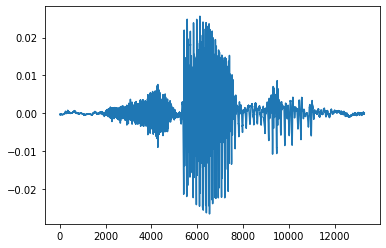

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(audio)

**Taking Log of FFT**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


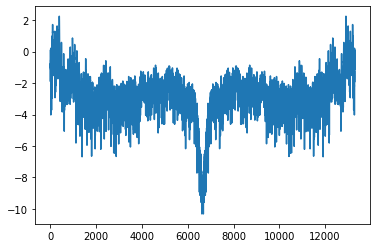

In [36]:
from scipy import fft
F = np.log(np.abs(fft(audio)))
plt.plot(F)

Getting sufficient Amount of data

In [37]:
F = np.array([[]])
for i in range(0,9):
  for j in range(0,10):
    audio, sampling_rate = librosa.load('/content/drive/MyDrive/soerenab AudioMNIST master data-01/{}_01_{}.wav'.format(i,j))
    F1 = np.log(np.abs(fft(audio)))
    F1 = F1[0:8000]
    F = np.append(F, F1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


In [39]:
F = F.reshape((90,8000,1,1))

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import AveragePooling2D
from keras import regularizers

In [41]:
import tensorflow as tf

**Defining the Model**

In [42]:
model = Sequential()
model.add(Conv2D(10, (1000, 1), activation="relu", kernel_regularizer=regularizers.l1(0.05)))
model.add(AveragePooling2D((20, 1)))
model.add(Conv2D(10, (100, 1), activation="relu"))
model.add(AveragePooling2D((2,1)))
model.add(Flatten())
model.add(Dense(50, activation = "relu"))
model.add(Dense(9, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm=1), metrics=["acc"])

**Making the Labels**

In [43]:
L = np.array([])
for i in range(0,9):
  for j in range(0,10):
    L = np.append(L, i)

In [44]:
L = L.reshape((-1,1))

In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
Labels = encoder.fit_transform(L).toarray()

In [46]:
def shuffle(a, b):
  x = np.random.permutation(90)
  return a[x], b[x]

In [47]:
data, Label = shuffle(F, Labels)

In [48]:
model.fit(data, Label, batch_size=4, epochs=50, validation_split=0.15)

Epoch 1/50
19/19 [==============================] - 15s 712ms/step - loss: 7.9067 - acc: 0.1184 - val_loss: 7.6237 - val_acc: 0.0000e+00
Epoch 2/50
19/19 [==============================] - 10s 554ms/step - loss: 7.2995 - acc: 0.1053 - val_loss: 6.9763 - val_acc: 0.0714
Epoch 3/50
19/19 [==============================] - 10s 552ms/step - loss: 6.6146 - acc: 0.0921 - val_loss: 6.2398 - val_acc: 0.0000e+00
Epoch 4/50
19/19 [==============================] - 10s 549ms/step - loss: 5.8859 - acc: 0.1053 - val_loss: 5.5351 - val_acc: 0.1429
Epoch 5/50
19/19 [==============================] - 10s 548ms/step - loss: 5.2188 - acc: 0.1711 - val_loss: 4.9053 - val_acc: 0.1429
Epoch 6/50
19/19 [==============================] - 10s 556ms/step - loss: 4.6079 - acc: 0.1579 - val_loss: 4.5369 - val_acc: 0.1429
Epoch 7/50
19/19 [==============================] - 10s 549ms/step - loss: 4.1240 - acc: 0.2105 - val_loss: 3.9700 - val_acc: 0.2143
Epoch 8/50
19/19 [==============================] - 12s 658ms

In [49]:
model.save('Model')

INFO:tensorflow:Assets written to: Model/assets
